In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('precision', 4)
sns.set_style('whitegrid')

In [ ]:
diabetes = load_diabetes()
print('Desc')
print(diabetes.DESCR)
print('Data shape')
print(diabetes.data.shape)
print('Target shape')
print(diabetes.target.shape)
print('Feature names')
print(diabetes.feature_names)

Desc
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see

In [ ]:
target_column_name = 'OneYearProgression'
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df[target_column_name] = pd.Series(diabetes.target)
print('Dataframe desc')
print(diabetes_df.describe())
print('Dataframe head')
print(diabetes_df.head())

Dataframe desc
              age         sex  ...          s6  OneYearProgression
count  4.4200e+02  4.4200e+02  ...  4.4200e+02            442.0000
mean  -3.6343e-16  1.3083e-16  ... -3.4129e-16            152.1335
std    4.7619e-02  4.7619e-02  ...  4.7619e-02             77.0930
min   -1.0723e-01 -4.4642e-02  ... -1.3777e-01             25.0000
25%   -3.7299e-02 -4.4642e-02  ... -3.3179e-02             87.0000
50%    5.3831e-03 -4.4642e-02  ... -1.0777e-03            140.5000
75%    3.8076e-02  5.0680e-02  ...  2.7917e-02            211.5000
max    1.1073e-01  5.0680e-02  ...  1.3561e-01            346.0000

[8 rows x 11 columns]
Dataframe head
      age     sex     bmi      bp  ...      s4      s5      s6  OneYearProgression
0  0.0381  0.0507  0.0617  0.0219  ... -0.0026  0.0199 -0.0176               151.0
1 -0.0019 -0.0446 -0.0515 -0.0263  ... -0.0395 -0.0683 -0.0922                75.0
2  0.0853  0.0507  0.0445 -0.0057  ... -0.0026  0.0029 -0.0259               141.0
3 -0.0891 -0

Sampling graphs


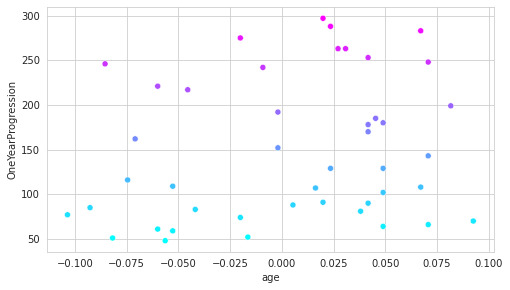

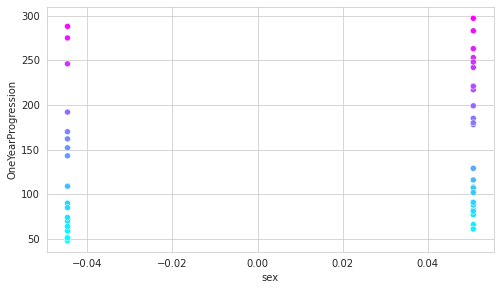

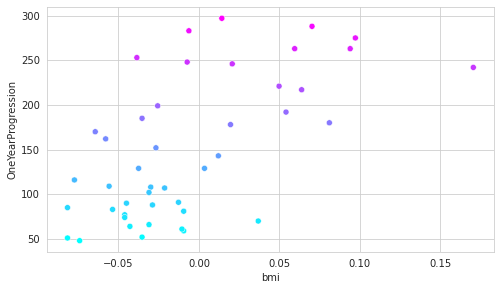

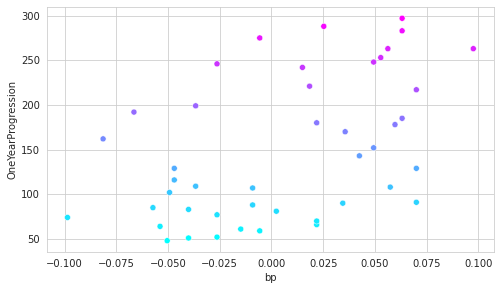

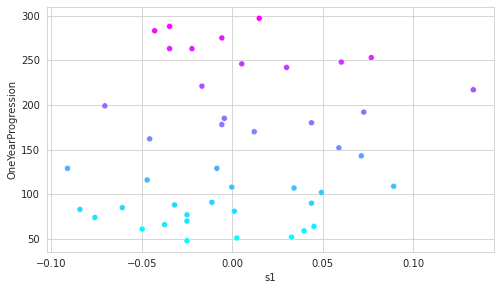

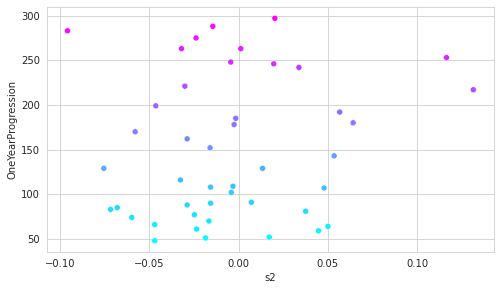

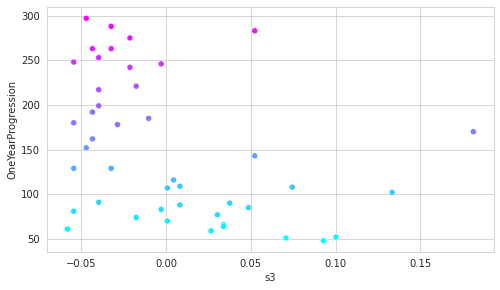

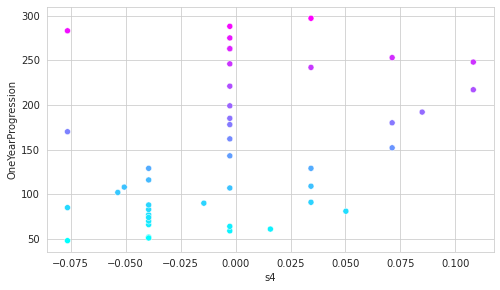

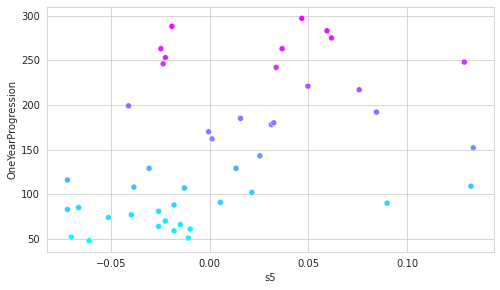

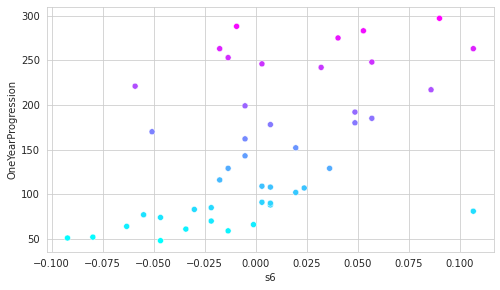

In [ ]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)
print('Sampling graphs')
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, 
                    y=target_column_name, hue=target_column_name, 
                    palette='cool', legend=False)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')
linear_regression.intercept_

       age: -60.221893331882335
       sex: -266.45890749037505
       bmi: 523.0596748020042
        bp: 310.51485159166873
        s1: -336.17030792547865
        s2: 137.344544538294
        s3: -131.13560429688624
        s4: -1.1485501589064313
        s5: 622.3374924905781
        s6: 60.46751763603552


152.22835839334243

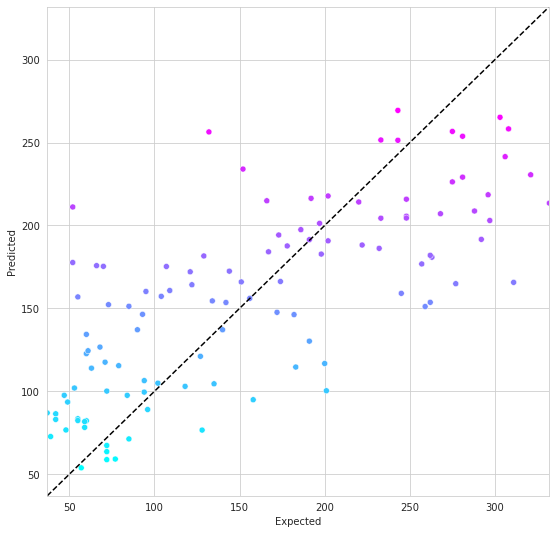

In [ ]:
predicted = linear_regression.predict(X_test)
expected = Y_test
test_df = pd.DataFrame()
test_df['Expected'] = pd.Series(expected)
test_df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=test_df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

In [ ]:
print(metrics.r2_score(expected, predicted))
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

0.5322440129151977
LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
